In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import math

In [3]:
file = pd.read_csv("/content/drive/MyDrive/IR-assignment-2-data (2).txt", sep=' ', header=None)
#print(file)
file.drop(file.columns[[138]], axis = 1, inplace = True)
file = file[file[1] == 'qid:4']
#print(file)



In [4]:
#sort qid:4 in descending order
desc_file = file.sort_values(by=[0], ascending=False, ignore_index=True)

In [5]:
#printing first 5 entries
desc_file.head()

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,127:32,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0
1,2,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,127:19,128:0,129:0,130:2417,131:721,132:14,133:113,134:0,135:13,136:47.9
2,2,qid:4,1:3,2:2,3:2,4:0,5:3,6:1,7:0.666667,8:0.666667,...,127:33,128:8,129:3,130:1888,131:9338,132:3,133:11,134:0,135:0,136:0
3,2,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:17,128:0,129:2,130:12028,131:11379,132:26,133:24,134:0,135:77,136:23.9595223404047
4,2,qid:4,1:3,2:0,3:3,4:3,5:3,6:1,7:0,8:1,...,127:67,128:27,129:0,130:814,131:13555,132:108,133:113,134:0,135:0,136:0


In [19]:
#creating the file
rr={}
for iterator in range(0,len(file.index)):
    qid=file.at[iterator,1]
    if ("qid:4"==qid):
        rr[iterator]=file.at[iterator,0]

In [21]:
def urlquery(aa, rr):
    df=aa.drop((aa.index[len(rr):]))
    
    np.savetxt('new.txt',df.values,delimiter=" ",fmt='%s')

urlquery(file,rr)
tid=rr.items()
tid=list(tid)
rr=sorted(rr.items(),key=lambda pairs:(pairs[1],pairs[0]),reverse=True)

In [22]:
print(rr)

[(101, 1), (100, 1), (99, 1), (96, 1), (92, 1), (90, 1), (88, 1), (85, 1), (84, 1), (83, 1), (82, 1), (76, 1), (75, 1), (74, 1), (72, 1), (68, 1), (66, 1), (62, 1), (61, 1), (60, 1), (58, 1), (55, 1), (53, 1), (52, 1), (40, 1), (38, 1), (37, 1), (36, 1), (34, 1), (32, 1), (29, 1), (25, 1), (24, 1), (22, 1), (21, 1), (20, 1), (19, 1), (18, 1), (17, 1), (13, 1), (10, 1), (7, 1), (6, 1), (4, 1), (102, 0), (98, 0), (97, 0), (95, 0), (94, 0), (93, 0), (91, 0), (89, 0), (87, 0), (86, 0), (81, 0), (80, 0), (79, 0), (78, 0), (77, 0), (73, 0), (71, 0), (70, 0), (69, 0), (67, 0), (65, 0), (64, 0), (63, 0), (59, 0), (57, 0), (56, 0), (54, 0), (51, 0), (50, 0), (49, 0), (48, 0), (47, 0), (46, 0), (45, 0), (44, 0), (43, 0), (42, 0), (41, 0), (39, 0), (35, 0), (33, 0), (31, 0), (30, 0), (28, 0), (27, 0), (26, 0), (23, 0), (16, 0), (15, 0), (14, 0), (12, 0), (11, 0), (9, 0), (8, 0), (5, 0), (3, 0), (2, 0), (1, 0), (0, 0)]


 **Part 1**

In [11]:
# finding MAX DCG

dcg_max = 0
disGain = 0
rel_score = {}
files_all = 1

#finding maximum DCG

for i in range(desc_file.shape[0]):
  rel = desc_file.iloc[i,0]
  if(i==0):
    dcg_max = desc_file.iloc[i,0]
  else:
    dcg_max = dcg_max + rel/math.log(i+1, 2)

  if rel in rel_score:
    rel_score[rel] += 1
  else:
    rel_score[rel] = 1

  

#finding DCG

for i in range(file.shape[0]):
  rel = file.iloc[i,0]
  if(i==0):
    disGain = file.iloc[i,0]
  else:
    disGain = disGain + rel / math.log(i+1, 2)


print(f'Max DCG (MDCG) is: {dcg_max} \n')
print(f'DCG is: {disGain} \n')


for a in rel_score:
  files_all = files_all * math.factorial(rel_score[a])

print(f'Number of such files possible are: {files_all}')

Max DCG (MDCG) is: 20.989750804831445 

DCG is: 12.550247459532576 

Number of such files possible are: 19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


**Part 2**

In [13]:
Normalized_dcg=disGain/dcg_max
print(f'Normalized DCG for whole dataset is: {Normalized_dcg} \n')

first50=file.iloc[:50]
#print(first50)
sorted50 = first50.sort_values(by=[0], ascending=False, ignore_index=True)
#print(sorted50)


dcg_max50 = 0
disGain50 = 0


#finding maximum DCG

for i in range(sorted50.shape[0]):
  r = sorted50.iloc[i,0]
  if(i==0):
    dcg_max50 = r
  else:
    dcg_max50 = dcg_max50 + r/math.log(i+1, 2)

  

#finding DCG

for i in range(first50.shape[0]):
  r = first50.iloc[i,0]
  if(i==0):
    disGain50 = r
  else:
    disGain50 = disGain50 + r / math.log(i+1, 2)

top50=disGain50/dcg_max50
print(f'NDCG for first 50 entries is: {top50} \n')

Normalized DCG for whole dataset is: 0.5979226516897831 

NDCG for first 50 entries is: 0.5253808413557646 



**Part 3**

In [14]:
#select the relevance entry column
rel_score1=file.iloc[:,0]
#print(rel_array)

#Taking the 75 th feature
th75feature=file.iloc[:,76]
#print(feature_75)

#counting all with relevant >=1 and assigning 1 all >=1 in rel_score1
all_relevant=0
for k in range(len(rel_score1)):
  if(rel_score1[k]>=1):
    all_relevant=all_relevant+1
    rel_score1[k]=1

key_value = dict(zip(th75feature, rel_score1))
sorted_key_value=sorted(key_value.items(),reverse=True)







In [16]:
data_precision=[]
data_recall=[]
rel_temporary=0
total=0
for q,r in sorted_key_value:
  total=total+1
  if(r==1):
    rel_temporary=rel_temporary+1
  x=rel_temporary/total
  y=rel_temporary/all_relevant
  data_precision.append(x)
  data_recall.append(y)


Text(0.5, 1.0, 'Precison-Recall Graph')

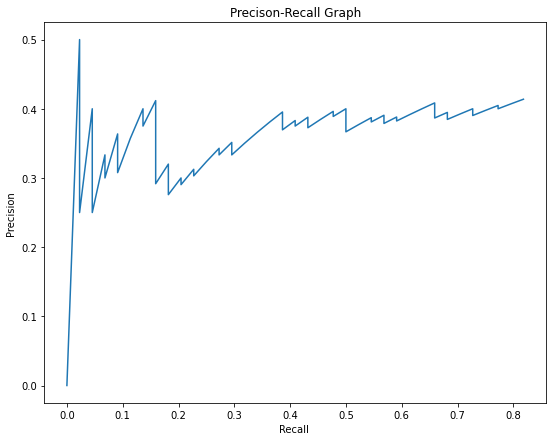

In [17]:
plt.figure(figsize=(9,7))
plt.plot(data_recall,data_precision)
plt.xlabel('Recall ')
plt.ylabel('Precision ')
plt.title('Precison-Recall Graph')